In [37]:
#Importing the libaies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Internship\Project\NLP\Email Spam Detection\Project_2\messages.csv",encoding='latin-1')

In [5]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [6]:
#Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2893, 3)


In [9]:
#Checking for the null values
df.isnull().values.any()

True

In [8]:
#Checkin for the null values in columns
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

##### Observation: 62 row are missing in the subject columns that means 62 emails are without subject heading. So I am not going to drop Nan rows for subject column because we build our model with message and label column

In [7]:
print("Count of label:\n",df['label'].value_counts())

Count of label:
 0    2412
1     481
Name: label, dtype: int64


#### Observation: Here in our dataset 1 stands for Spam mail and 0 stands for not a spam mail

In [16]:
#Checking the Ratio of labels
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['label']==0])/len(df['label']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 83.0 %
Spam Email Ratio that is 1 label: 17.0 %


#### Observation: Among all the mail only 17% mail are Spam email and that is in good amount.

In [18]:
#Creating the new column for length of message column
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [21]:
df['message'][3]

"a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?\n"

In [22]:
#Converting all messages to lower case
df['message'] = df['message'].str.lower()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


### Regular Expressions

In [23]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [24]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [25]:
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [26]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [27]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [34]:
#Total length removal
print("Origional Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Origional Length: 9344743
Cleaned Length: 6767857
Total Words Removed: 2576886


#### Observation: Here we see the origional length of our message column and cleaned length of our message columns and their difference.

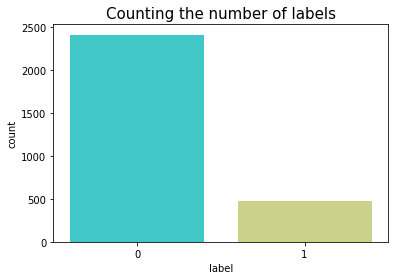

0    2412
1     481
Name: label, dtype: int64


In [45]:
#Rates the overall material and finish of the house.
plt.figure(figsize=(6,4))
sns.countplot(df['label'],palette= 'rainbow')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

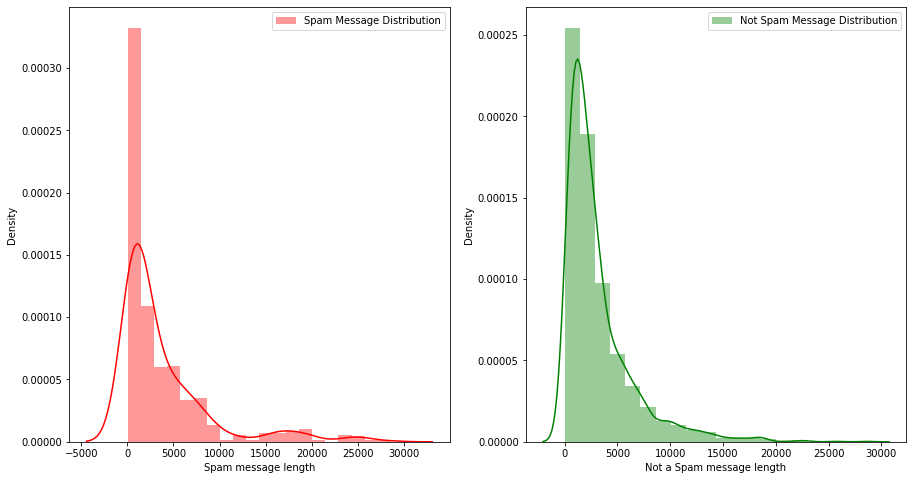

In [53]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

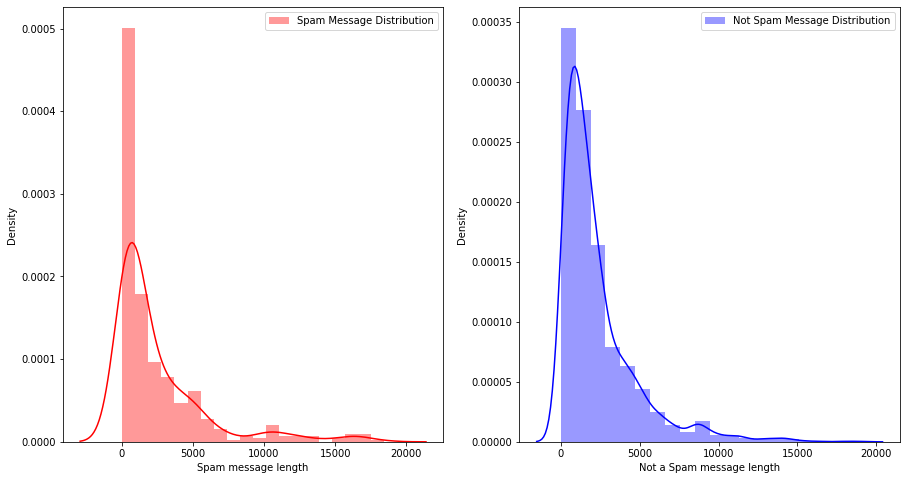

In [54]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

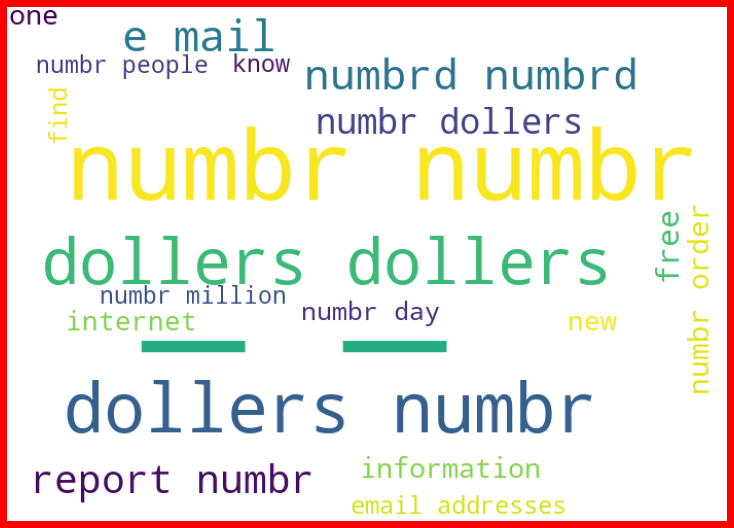

In [48]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

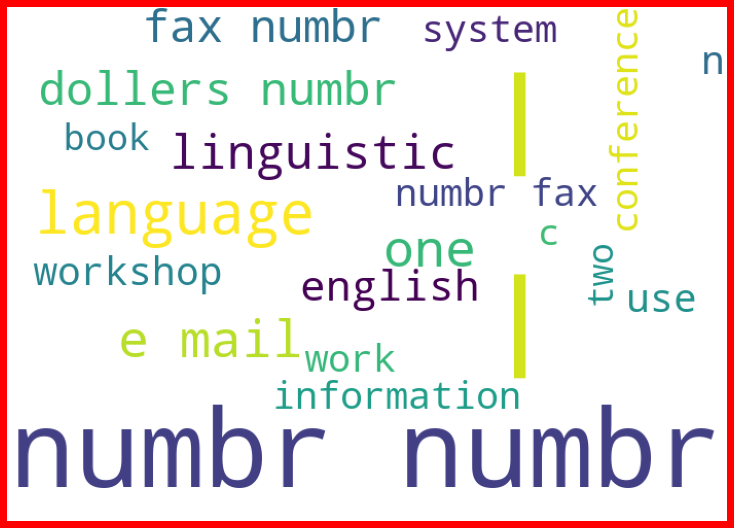

In [49]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


not_spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Converting the text into vectors using TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(df['message'])

In [56]:
y = df['label']

### Multinomial NB

In [57]:
# Train the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
naive = MultinomialNB()
naive.fit(X_train,Y_train)

MultinomialNB()

In [58]:
#Making Prediction
y_pred= naive.predict(x_test)

In [59]:
#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuacy Score
print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [60]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)

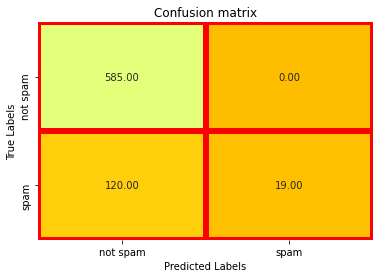

In [74]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia_r')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [62]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



### Passive Aggressive Classifier Algorithm

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

In [68]:
#Training the model
pac.fit(X_train,Y_train)

PassiveAggressiveClassifier()

In [70]:
#Makeing prediction
pred = pac.predict(x_test)

In [71]:
#Accuracy
score = accuracy_score(y_test,pred)
print("Accuracy: %0.3f" %score)

Accuracy: 0.992


In [72]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred)
cm

array([[584,   1],
       [  5, 134]], dtype=int64)

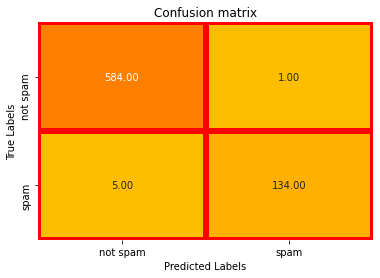

In [76]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Wistia')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [77]:
#Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.96      0.98       139

    accuracy                           0.99       724
   macro avg       0.99      0.98      0.99       724
weighted avg       0.99      0.99      0.99       724



### Saving the best Model

In [136]:
#Saving this model that is Passive Aggressive Classifier
import joblib

#Save the model as a pickle in a file
joblib.dump(pac,'Email_Spam_Detection_TFIDF.csv')

['Email_Spam_Detection_TFIDF.csv']

### Conclusion: In Between Multinomial NB and Passive Aggressive Classifier Algorithm , Passive Aggressive Classifier gives the best result so we save this model as our final model.

# Using LSTM OR Bidirectional LSTM

In [90]:
#Get the Independent Features
X = df.drop('label',axis=1)

In [91]:
#Get the Dependent Features
y = df['label']

In [92]:
#Checking the shape
X.shape, y.shape

((2893, 4), (2893,))

In [93]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [94]:
### Dataset preprocessing w.r.t title column

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
ps = PorterStemmer()
corpus = []
for i in range(0,len(X)):
    review = re.sub(r'[^a-zA-z]',' ',X['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [95]:
corpus[0]

'content length numbr appl iss research center us doller numbr million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least numbr numbr year relev work experi technic msc degre least numbr numbr year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri experi join

### Onehot Representation

In [78]:
#### Defining the Vocabulary Size
voc_size = 10000

In [79]:
### Importing the tensorflow library and checking it's vesion
import tensorflow as tf

tf.__version__

'2.3.1'

In [104]:
# Importing the one hot encoder libary
from tensorflow.keras.preprocessing.text import one_hot

onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr[3]

[1528,
 2204,
 6574,
 455,
 9006,
 7390,
 4272,
 8975,
 5502,
 6574,
 5508,
 5924,
 7931,
 3754,
 9158,
 2161,
 3471,
 2204,
 3387,
 9006,
 6128,
 2331,
 2529,
 1534,
 5621,
 7370,
 1237,
 6514,
 4527]

### Embedding Representation

In [105]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=100
embedded_docs = pad_sequences(onehot_repr, padding ='pre', maxlen=sent_length)
print(embedded_docs)

[[6588  466 2346 ... 5842 9869 9427]
 [8164 9885 1559 ... 3517 5738 7179]
 [1600 1816 8230 ...  538 3349 2445]
 ...
 [   0    0    0 ... 5349  279 7751]
 [5621  538 8781 ... 1672 8870 6475]
 [   0    0    0 ... 9721 2234 6117]]


In [107]:
embedded_docs[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 1528, 2204, 6574,  455, 9006, 7390,
       4272, 8975, 5502, 6574, 5508, 5924, 7931, 3754, 9158, 2161, 3471,
       2204, 3387, 9006, 6128, 2331, 2529, 1534, 5621, 7370, 1237, 6514,
       4527])

### Creating Model

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

# Defining the dimension of the sequence
embedding_vector_features = 150

# Creating Models
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
#model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 150)          1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,600,501
Trainable params: 1,600,501
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
embedded_docs.shape

(2893, 100)

In [125]:
y.shape

(2893,)

In [126]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [127]:
X_final.shape, y_final.shape

((2893, 100), (2893,))

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final, test_size=0.33, random_state=42)

In [129]:
#Model Training
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64)

Epoch 1/10
31/31 [==============================] - 7s 235ms/step - loss: 0.4481 - accuracy: 0.8338 - val_loss: 0.2607 - val_accuracy: 0.8639
Epoch 2/10
31/31 [==============================] - 7s 222ms/step - loss: 0.1434 - accuracy: 0.9675 - val_loss: 0.1008 - val_accuracy: 0.9738
Epoch 3/10
31/31 [==============================] - 7s 222ms/step - loss: 0.0338 - accuracy: 0.9938 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 4/10
31/31 [==============================] - 8s 251ms/step - loss: 0.0096 - accuracy: 0.9990 - val_loss: 0.0502 - val_accuracy: 0.9832
Epoch 5/10
31/31 [==============================] - 8s 257ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9906
Epoch 6/10
31/31 [==============================] - 8s 250ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.0660 - val_accuracy: 0.9822
Epoch 7/10
31/31 [==============================] - 8s 249ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9853
Epoch 

## Performance Metrics And Accuracy

In [130]:
y_pred = model.predict_classes(X_test)

In [131]:
#Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.981151832460733


In [132]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[763,  10],
       [  8, 174]], dtype=int64)

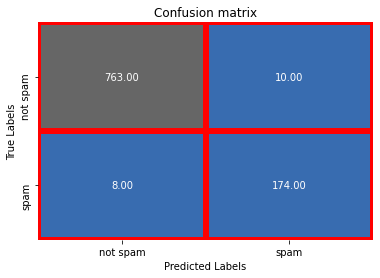

In [133]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Accent')

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [134]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       773
           1       0.95      0.96      0.95       182

    accuracy                           0.98       955
   macro avg       0.97      0.97      0.97       955
weighted avg       0.98      0.98      0.98       955



### Conclusion: Here in between LSTM and Bidirectional LSTM , LSTM model gives the best result.